In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn import datasets

from patchNr.PatchFlowModel import PatchFlowModel

In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
def get_batch(samples):
    data, _ = datasets.make_moons(n_samples=samples, noise=0.06)
    return torch.from_numpy(np.array(data, dtype=np.float32))

In [4]:
batch = get_batch(512)
batch.shape

torch.Size([512, 2])

Plot of the 2 dimensional gaussian base distribution

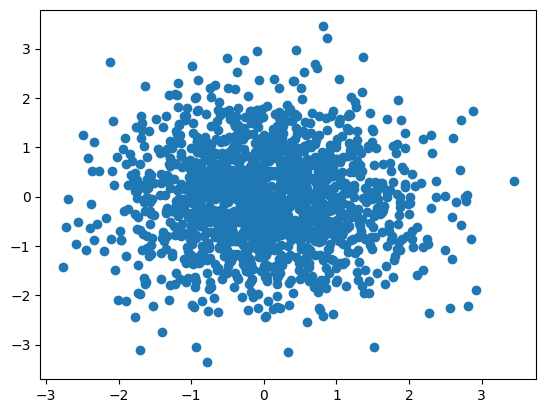

In [5]:
a, b  = zip(*np.random.multivariate_normal(np.zeros(2), np.eye(2), 1500))
plt.scatter(a,b)

Plot of the 2 dimensional target distribution

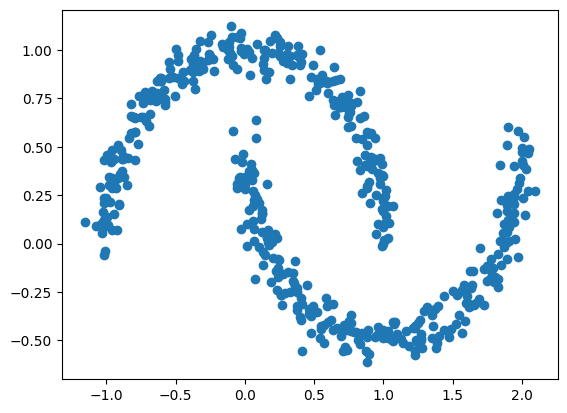

In [6]:
x, y= zip(*batch)
plt.scatter(x, y)

In [8]:
loaded_flow = PatchFlowModel(path='../results/moon_flow.pth')

Plot of the learned target distribution

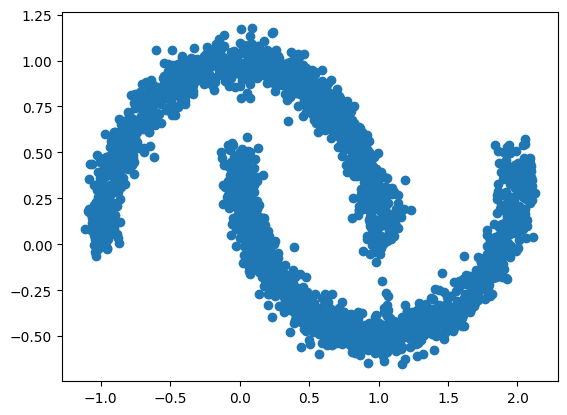

In [9]:
z, log_det = loaded_flow(torch.tensor(np.random.multivariate_normal(np.zeros(2), np.eye(2), 2500), dtype=torch.float))
xr, yr = zip(*z.detach().numpy())
plt.scatter(xr, yr)